In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score #AUC score
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from time import time
import xgboost as xgb
from sklearn import neighbors
import sys


%matplotlib inline

h:\anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
h:\anaconda3\envs\py27\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 1. Load Data

In [2]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")

print len(train.columns)
print len(test.columns)

371
370


In [4]:
print "training set shape: ", train.shape
print "test set shape: ", test.shape

training set shape:  (76020, 371)
test set shape:  (75818, 370)


number of training data:  76020
number of features:  369
number of satisfied customers:  73012
number of unsatisfied customers:  3008


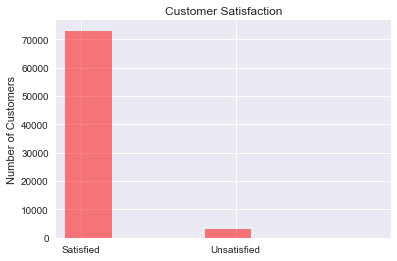

In [5]:
# number of training data
print "number of training data: ",len(train)
#print type(train.columns.values)
print "number of features: ",len(train.columns)-2  #Exclude ID and Target
print "number of satisfied customers: ",len(train[train["TARGET"]==0])

#print type(train[train["TARGET"]==0])
print "number of unsatisfied customers: ",len(train[train["TARGET"]==1])

plt.hist(train['TARGET'],np.arange(0,1.5,0.3),alpha=0.5,color='r')
plt.title("Customer Satisfaction")
plt.xticks(np.arange(3)+0.10,('Satisfied','Unsatisfied'))
plt.ylabel("Number of Customers")
plt.show()

In [6]:
#number of test data
print "number of test data: ",len(test)
print "number of features: ",len(test.columns)-1

number of test data:  75818
number of features:  369


### 2. Data Cleaning
##### -Observation: Some columns have constant values and some columns are duplicate. We can find out those columns and remove them to decrease the number of features.

In [7]:
#Boolean value to indicate if this is a column with constant value
removed_col = []

# (1)find out columns with constant values
for col in train.columns:
    first = train.ix[0,[col]].values
    if (train[col].values == first * np.ones(len(train)).astype(float)).all():
        removed_col.append(col)

print removed_col,
print "\n\n number of columns removed: ",len(removed_col)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3'] 

 number of columns removed:  34


In [8]:
#removed columns with constant values
train.drop(removed_col,axis=1,inplace=True)
test.drop(removed_col,axis=1,inplace=True)
print len(train.columns)

337


In [9]:
# (2)Check if there are duplicated columns
removed_same_col = []
columns = train.columns[0:-1]
print len(columns)
for i in xrange(len(columns)-1):
    for j in range(i+1,len(columns)):
        if (train[columns[i]].values == train[columns[j]].values).all():
            removed_same_col.append(columns[i+1])

print "number of duplicated columns: ",len(removed_same_col)
print removed_same_col

336
number of duplicated columns:  29
['ind_var6', 'ind_var8_0', 'ind_var13_medio', 'ind_var18', 'ind_var26_cte', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var41_0', 'num_var6', 'num_var8_0', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var41_0', 'saldo_var8', 'saldo_var13', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3']


In [10]:


#removed duplicaed columns
train.drop(removed_same_col,axis=1,inplace=True)
test.drop(removed_same_col,axis=1,inplace=True)
print len(train.columns)
print len(test.columns)


308
307


In [11]:
print "training data shape: ",train.shape
print "test data shape: ",test.shape

print "\n\nDisplay train dataset stats"
display(train.describe())

training data shape:  (76020, 308)
test data shape:  (75818, 307)


Display train dataset stats


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### 3. Feature Scaling
#### From the data describtion above, we can see that the "mean" and "std" among all the features have huge different. We can do Feature Scaling to create a better representation of customers.

In [12]:
y_all = train['TARGET']
X_all = train.drop(['ID','TARGET'],axis=1)

#split data in training dataset
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size = 0.2)

kaggle_test = test.drop(['ID'],axis=1)
print "X train set size: ",X_train.shape
print "Y train set size: ",y_train.shape
print "X test set size: ",X_test.shape
print "kaggle test set size: ",kaggle_test.shape

#display(X_train.describe())


X train set size:  (60816, 306)
Y train set size:  (60816L,)
X test set size:  (15204, 306)
kaggle test set size:  (75818, 306)


In [21]:
print y_train.shape
print y_all.shape

print y_train.values
print y_all.values
print type(y_train)
print type(y_all)

print '\n'

print X_train.shape
print X_all.shape
print type(X_all)
print type(X_train)


print '\n'

print y_train.shape[0]+y_test.shape[0]
print X_train.shape[0]+X_test.shape[0]

(60816L,)
(76020L,)
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


(60816, 306)
(76020, 306)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


76020
76020


In [22]:
#Normalize X_train Datasets to range (0,1)
mms = MinMaxScaler()
X_all_norm = pd.DataFrame(mms.fit_transform(X_all),columns=X_all.columns)
X_train_norm = pd.DataFrame(mms.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(mms.fit_transform(X_test),columns=X_test.columns)
kaggle_test_norm = pd.DataFrame(mms.fit_transform(kaggle_test),columns=kaggle_test.columns)
display(X_train_norm.describe())

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,...,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.998154,0.281982,0.000423,0.007185,0.005623,0.000427,0.000563,0.000066,0.000090,0.000359,...,0.000032,0.000155,0.000095,0.000087,0.000093,0.000192,0.000075,0.000163,0.000126,0.005087
std,0.040101,0.129279,0.008164,0.033559,0.025704,0.010913,0.012890,0.004979,0.005759,0.010297,...,0.004862,0.008942,0.007395,0.005825,0.005956,0.009239,0.005863,0.007638,0.006207,0.008482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.999764,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002838
50%,0.999764,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004594
75%,0.999764,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005146
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Feature Selection

In [23]:
#Ramdom Forest Classifier to find out the top important features
feat_labels = X_train.columns
forest = RandomForestClassifier(n_estimators=130,criterion="entropy",random_state=0,n_jobs=-1)
forest.fit(X_train_norm,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] #argsort return the indices that sort the array
total_importance_first_50 = 0
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
    if f<=49:
        total_importance_first_50 += importances[indices[f]]
    
print "total importance for first 50 features: ", total_importance_first_50

 1) var38                          0.301594
 2) var15                          0.190290
 3) saldo_medio_var5_ult3          0.029027
 4) num_var45_ult3                 0.020695
 5) saldo_medio_var5_hace2         0.020666
 6) saldo_medio_var5_hace3         0.019907
 7) saldo_medio_var5_ult1          0.019197
 8) saldo_var30                    0.018550
 9) saldo_var5                     0.018327
10) num_var45_hace3                0.016922
11) num_var22_ult3                 0.015980
12) saldo_var42                    0.015750
13) num_var45_hace2                0.015178
14) num_meses_var5_ult3            0.011709
15) var36                          0.010956
16) num_var45_ult1                 0.010908
17) num_med_var45_ult3             0.010559
18) num_var22_hace3                0.010424
19) num_var22_hace2                0.009931
20) num_meses_var39_vig_ult3       0.009801
21) num_var30                      0.007875
22) num_var22_ult1                 0.007857
23) num_var35                   

In [24]:
print total_importance_first_50

0.909560658303


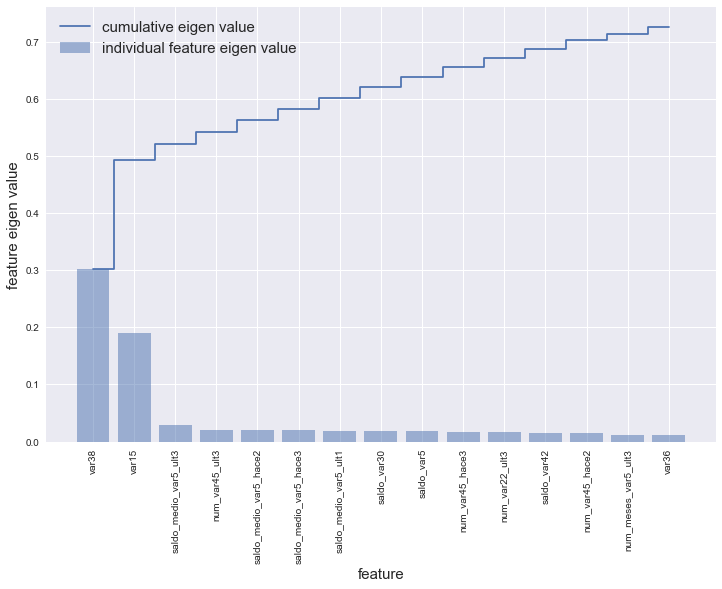

In [25]:
Eigen_value = pd.Series(importances,index=X_train.columns.values).sort_values(ascending=False)
cum_Eigen_value = np.cumsum(Eigen_value)

#print Features
#Feature Importance Visualization
#plt.figure(size=(30,30))
plt.figure(figsize=(12,8))
plt.bar(range(1,16),Eigen_value[:15], alpha=0.5,align='center',label='individual feature eigen value')
plt.step(range(1,16), cum_Eigen_value[:15], where='mid',label='cumulative eigen value')
plt.xticks(range(1,16),Eigen_value.index[:15], rotation=90)
plt.ylabel('feature eigen value',fontsize=15)
plt.xlabel('feature',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

#### sklearn SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. 

In [26]:
featSelected = SelectFromModel(forest, prefit=True)

#get the list of selected features
print type(featSelected.get_support())
feature_boolean_array = featSelected.get_support()
print type(feature_boolean_array)
print type(np.array(X_all_norm.columns[feature_boolean_array]))

feature_selected = pd.DataFrame(np.array(X_all_norm.columns[feature_boolean_array]),columns=["Selected Features"])
print feature_selected

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
           Selected Features
0                       var3
1                      var15
2    imp_op_var39_comer_ult1
3    imp_op_var39_comer_ult3
4    imp_op_var41_comer_ult1
5    imp_op_var41_comer_ult3
6    imp_op_var41_efect_ult3
7          imp_op_var41_ult1
8    imp_op_var39_efect_ult1
9    imp_op_var39_efect_ult3
10         imp_op_var39_ult1
11                  ind_var5
12                 ind_var30
13                  num_var4
14         num_op_var41_ult3
15         num_op_var39_ult3
16                 num_var30
17                 num_var35
18               num_var39_0
19                 num_var42
20                saldo_var5
21               saldo_var30
22               saldo_var37
23               saldo_var42
24                     var36
25      imp_trans_var37_ult1
26           num_var22_hace2
27           num_var22_hace3
28            num_var22_ult1
29            num_var22_ult3
30        num_med_var22_ult3
31 

In [28]:
print type(X_all_norm)
print type(X_train_norm)
print type(X_test_norm)

print X_all_norm.shape
print X_train_norm.shape
print X_test_norm.shape

print type(y_all)
print type(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(76020, 306)
(60816, 306)
(15204, 306)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [31]:
X_all_1 = pd.DataFrame(featSelected.transform(X_all_norm.values))
print X_all_1.shape
print type(X_all_1)

print X_all_norm.shape
print type(X_all_norm)

(76020, 43)
<class 'pandas.core.frame.DataFrame'>
(76020, 306)
<class 'pandas.core.frame.DataFrame'>


In [32]:
#reduce X based on importance of features
X_all_norm = pd.DataFrame(featSelected.transform(X_all_norm.values)) 
X_train_norm = pd.DataFrame(featSelected.transform(X_train_norm.values)) 
X_test_norm = pd.DataFrame(featSelected.transform(X_test_norm.values))
kaggle_test_norm = pd.DataFrame(featSelected.transform(kaggle_test_norm.values))

In [34]:
print X_all.shape
print X_all_norm.shape
print X_train.shape
print X_train_norm.shape
print X_test_norm.shape
print kaggle_test_norm.shape

print "\ntarget train shape: ", y_train.shape
print "target test shape: ", y_test.shape

print type(X_all_norm)
print type(X_train)

(76020, 306)
(76020, 43)
(60816, 306)
(60816, 43)
(15204, 43)
(75818, 43)

target train shape:  (60816L,)
target test shape:  (15204L,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [36]:
#Plot for features selected after features transformation
feat_labels = feature_selected.values
forest = RandomForestClassifier(n_estimators=130,criterion="entropy",random_state=0,n_jobs=-1)
forest.fit(X_train_norm,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] #argsort return the indices that sort the array
total_importance_first_50 = 0
for f in range(X_train_norm.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
    if f<=49:
        total_importance_first_50 += importances[indices[f]]
    
print "total importance for all features: ", total_importance_first_50

 1) ['var38']                      0.308831
 2) ['var15']                      0.197440
 3) ['saldo_medio_var5_ult3']      0.035935
 4) ['saldo_var30']                0.027221
 5) ['saldo_medio_var5_hace2']     0.024785
 6) ['saldo_medio_var5_hace3']     0.023989
 7) ['num_var45_ult3']             0.023649
 8) ['saldo_medio_var5_ult1']      0.021256
 9) ['saldo_var42']                0.021222
10) ['saldo_var5']                 0.020406
11) ['num_var45_hace3']            0.018245
12) ['num_var22_ult3']             0.018089
13) ['num_var45_hace2']            0.016753
14) ['num_meses_var5_ult3']        0.012741
15) ['var36']                      0.012519
16) ['num_var45_ult1']             0.012358
17) ['num_var30']                  0.012313
18) ['num_meses_var39_vig_ult3']   0.011657
19) ['ind_var30']                  0.011345
20) ['num_med_var45_ult3']         0.011050
21) ['num_var4']                   0.011046
22) ['num_var22_hace3']            0.011035
23) ['num_var22_hace2']         

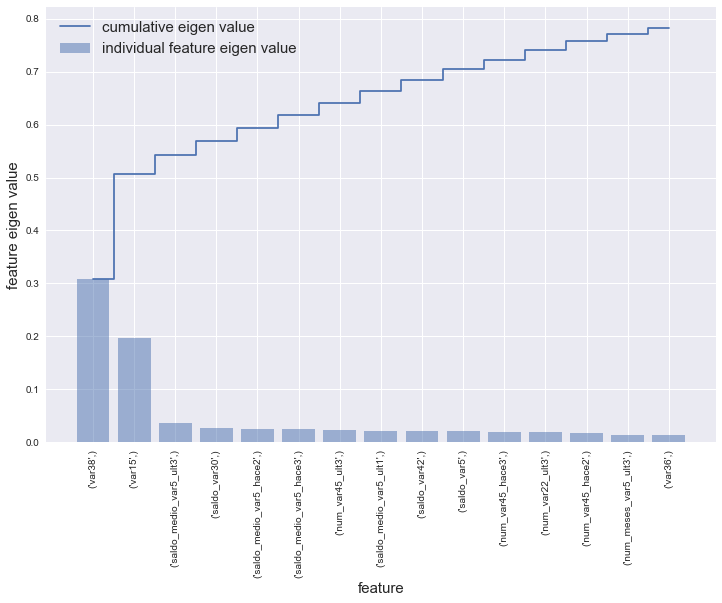

In [37]:
Eigen_value = pd.Series(importances,index=feat_labels).sort_values(ascending=False)
cum_Eigen_value = np.cumsum(Eigen_value)

#print Features
#Feature Importance Visualization
#plt.figure(size=(30,30))
plt.figure(figsize=(12,8))
plt.bar(range(1,16),Eigen_value[:15], alpha=0.5,align='center',label='individual feature eigen value')
plt.step(range(1,16), cum_Eigen_value[:15], where='mid',label='cumulative eigen value')
plt.xticks(range(1,16),Eigen_value.index[:15], rotation=90)
plt.ylabel('feature eigen value',fontsize=15)
plt.xlabel('feature',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

### 4.Model Selection

### Try different untuned classifiers here and compare the AUC. 

In [22]:

def train_predict(clf,X,y):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X))
    sys.stdout.flush()
    
    start = time()
    #clf.fit(X,y)
    training_score = cross_validation.cross_val_score(clf, X, y, scoring='roc_auc', cv=10)
    end = time()
    
    print "running time (secs): {}".format(end - start)
    print "training set score: {}".format(training_score.mean())
    sys.stdout.flush()
    
    '''
    start = time()
    y_pred = clf.predict_proba(X_t)
    test_score = roc_auc_score(y_t,y_pred[:,1])
    end = time()
    
    print "prediction time (secs): {}".format(end - start)
    print "test set score: {}".format(test_score)
    '''
    
    print "\n"
    print "---------------------------------------------------"
    sys.stdout.flush()
    return training_score.mean()

Dtree 
[ 0.          0.34630163  0.34685056  1.        ] 
[ 0.          0.15555556  0.15555556  1.        ] 
[ 2.   1.   0.5  0. ]
KNN 
[ 0.          0.00171538  0.00953753  0.03904213  0.14333745  1.        ] 
[ 0.0015873   0.01269841  0.04920635  0.17460317  0.3968254   1.        ] 
[ 1.   0.8  0.6  0.4  0.2  0. ]
RandomForest 
[ 0.          0.501784    0.50240154  0.51283107  0.51283107  0.51289968
  0.51303692  0.51303692  0.51351722  0.51351722  0.51358584  0.51372307
  0.51379168  0.85350624  0.85625086  0.86098532  0.87669823  0.87676685
  0.87944284  0.87951146  0.87978592  0.87999177  0.88019761  0.9534788
  0.95368464  0.95375326  0.98216001  0.99540277  0.99897077  0.99986277
  1.        ] 
[ 0.          0.36349206  0.36349206  0.37142857  0.37460317  0.37460317
  0.37460317  0.37619048  0.37619048  0.37777778  0.37777778  0.37777778
  0.37777778  0.70793651  0.71111111  0.71428571  0.73174603  0.73174603
  0.73492063  0.73492063  0.73492063  0.73492063  0.73492063  0.861904

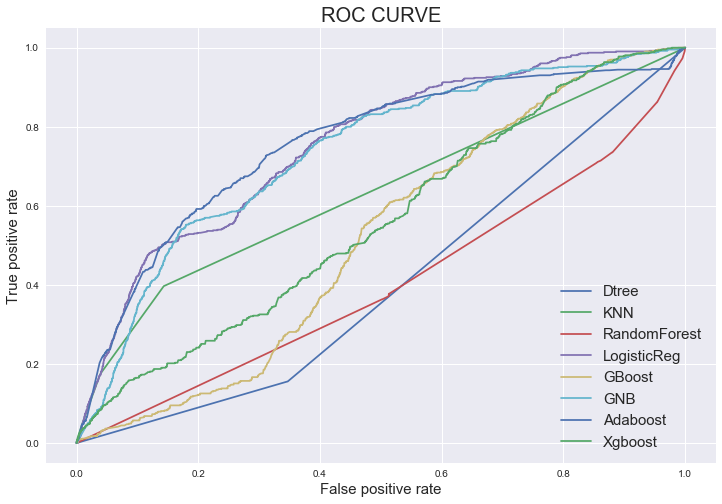

In [23]:
# Initialize the models
Dtree = DecisionTreeClassifier(random_state = 42)
KNN = neighbors.KNeighborsClassifier()
RandomForest = RandomForestClassifier(random_state = 42)
LogisticReg = linear_model.LogisticRegression(random_state = 42)
GBoost = GradientBoostingClassifier(random_state = 42)
GNB = GaussianNB()
Adaboost = AdaBoostClassifier(random_state = 42)
Xgboost = xgb.XGBClassifier()


clfName = ['Dtree','KNN','RandomForest','LogisticReg','GBoost','GNB','Adaboost','Xgboost']
clfList = [Dtree,KNN,RandomForest,LogisticReg,GBoost,GNB,Adaboost,Xgboost]

# Plots a ROC Curve of the list of models
plt.figure(figsize=(12,8))
for i in xrange(len(clfList)):

    clfList[i].fit(X_train_norm,y_train)
    y_pred = clfList[i].predict_proba(X_test_norm)
    if clfList[i] != RandomForest:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
        print clfName[i],"\n",fpr,"\n",tpr,"\n",thresholds
    else:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,0])
        print clfName[i],"\n",fpr,"\n",tpr,"\n",thresholds

    plt.plot(fpr, tpr, label=clfName[i])

plt.title(u'ROC CURVE',fontsize = 20)
plt.xlabel(u'False positive rate',fontsize = 15)
plt.ylabel(u'True positive rate',fontsize = 15)
plt.legend(loc=u'best',fontsize = 15)



In [24]:


#train and get the AUC score for each model
Dtree_AUC = train_predict(Dtree,X_all_norm,y_all)
KNN_AUC = train_predict(KNN,X_all_norm,y_all)
RandomForest_AUC = train_predict(RandomForest,X_all_norm,y_all)
LogisticReg_AUC = train_predict(LogisticReg,X_all_norm,y_all)
GBoost_AUC = train_predict(GBoost,X_all_norm,y_all)
GNB_AUC = train_predict(GNB,X_all_norm,y_all)
Adaboost_AUC = train_predict(Adaboost,X_all_norm,y_all)
Xgboost_AUC = train_predict(Xgboost,X_all_norm,y_all)


Training a DecisionTreeClassifier using a training set size of 76020. . .
running time (secs): 12.3310000896
training set score: 0.567602239243


---------------------------------------------------
Training a KNeighborsClassifier using a training set size of 76020. . .
running time (secs): 179.187000036
training set score: 0.631563649789


---------------------------------------------------
Training a RandomForestClassifier using a training set size of 76020. . .
running time (secs): 12.4609999657
training set score: 0.676317547357


---------------------------------------------------
Training a LogisticRegression using a training set size of 76020. . .
running time (secs): 8.77999997139
training set score: 0.775024851897


---------------------------------------------------
Training a GradientBoostingClassifier using a training set size of 76020. . .
running time (secs): 179.427000046
training set score: 0.83505028897


---------------------------------------------------
Training a Ga

### 5. Model Tuning

#### From the ROC curve plot above, we can see that Decision Tree has the worse performance. Xgboost and Adaboost has the relatively good performance.XGBClassifier is chosen to be tuned later since it has the highst cross-validation AUC score and the running time is much lower compared to GradientBoosting Classifier.

In [38]:
print X_train_norm[:].shape
print y_train.shape

print X_all_norm.shape
print y_all.shape

(60816, 43)
(60816L,)
(76020, 43)
(76020L,)


In [47]:
param_initial = {'n_estimators':[200],
         'learning_rate': [0.1],
         'max_depth':[5],
         'min_child_weight':[1],
         'subsample': [0.80],
         'colsample_bytree': [0.80],
         'gamma':[0]
        }

clf_initial = xgb.XGBClassifier(n_estimators=200, seed=42, silent=False)


tuned_XGB_initial = GridSearchCV(clf_initial,param_initial,scoring="roc_auc",cv=10)
tuned_XGB_initial.fit(X_train_norm,y_train.values)
print "XBG_1 Best Estimator: ", tuned_XGB_initial.best_estimator_    
print "best score: ",tuned_XGB_initial.best_score_
#clf_1.fit(X_train_norm, y_train.values, eval_metric='auc',verbose=True)




XBG_1 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.835254733612


In [48]:
y_train_pred = tuned_XGB_initial.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_initial.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test



score for training set:  0.911157766469
score for testing set:  0.750680178946


In [53]:
param_1 = {'n_estimators':[50, 100, 200, 300]}

clf_initial.set_params(n_estimators=200, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=0.80, 
                      colsample_bytree=0.80, gamma=0)

tuned_XGB_1 = GridSearchCV(clf_initial,param_1,scoring="roc_auc",cv=10)
tuned_XGB_1.fit(X_train_norm,y_train.values)
print "XBG_1 Best Estimator: ", tuned_XGB_1.best_estimator_    
print "best score: ",tuned_XGB_1.best_score_

XBG_1 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.83967865784


In [54]:
for i in range(0,len(tuned_XGB_1.grid_scores_)):
    print tuned_XGB_1.grid_scores_[i][0],tuned_XGB_1.grid_scores_[i][1]

{'n_estimators': 50} 0.839413728405
{'n_estimators': 100} 0.83967865784
{'n_estimators': 200} 0.835254733612
{'n_estimators': 300} 0.830430274021


In [68]:
y_train_pred = tuned_XGB_1.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_1.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.888047100139
score for testing set:  0.757664395599


In [56]:
param_2 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}

clf_initial.set_params(n_estimators=100)
print clf_initial
tuned_XGB_2 = GridSearchCV(clf_initial,param_2,scoring="roc_auc",cv=10)
tuned_XGB_2.fit(X_train_norm,y_train.values)
print "XBG_2 Best Estimator: ", tuned_XGB_2.best_estimator_    
print "best score: ",tuned_XGB_2.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_2 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.841661002809


In [61]:
for i in range(0,len(tuned_XGB_2.grid_scores_)):
    print tuned_XGB_2.grid_scores_[i][0],tuned_XGB_2.grid_scores_[i][1]



{'max_depth': 3, 'min_child_weight': 1} 0.840787098836
{'max_depth': 3, 'min_child_weight': 3} 0.841537750335
{'max_depth': 3, 'min_child_weight': 5} 0.841071088515
{'max_depth': 5, 'min_child_weight': 1} 0.83967865784
{'max_depth': 5, 'min_child_weight': 3} 0.84082428887
{'max_depth': 5, 'min_child_weight': 5} 0.841661002809
{'max_depth': 7, 'min_child_weight': 1} 0.836878354996
{'max_depth': 7, 'min_child_weight': 3} 0.838018294959
{'max_depth': 7, 'min_child_weight': 5} 0.839862590847
{'max_depth': 9, 'min_child_weight': 1} 0.833722465233
{'max_depth': 9, 'min_child_weight': 3} 0.834514307328
{'max_depth': 9, 'min_child_weight': 5} 0.837185231838


In [65]:
param_2b = {'max_depth':[4,5,6], 'min_child_weight':[4,5,6]}
clf_initial.set_params(n_estimators=100)
print clf_initial

tuned_XGB_2b = GridSearchCV(clf_initial,param_2b,scoring="roc_auc",cv=10)
tuned_XGB_2b.fit(X_train_norm,y_train.values)
print "XBG_2 Best Estimator: ", tuned_XGB_2b.best_estimator_    
print "best score: ",tuned_XGB_2b.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_2 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842063680243


In [67]:
for i in range(0,len(tuned_XGB_2b.grid_scores_)):
    print tuned_XGB_2b.grid_scores_[i][0],tuned_XGB_2b.grid_scores_[i][1]

{'max_depth': 4, 'min_child_weight': 4} 0.841745385028
{'max_depth': 4, 'min_child_weight': 5} 0.841984147933
{'max_depth': 4, 'min_child_weight': 6} 0.842063680243
{'max_depth': 5, 'min_child_weight': 4} 0.841316533328
{'max_depth': 5, 'min_child_weight': 5} 0.841661002809
{'max_depth': 5, 'min_child_weight': 6} 0.841233196642
{'max_depth': 6, 'min_child_weight': 4} 0.840472391771
{'max_depth': 6, 'min_child_weight': 5} 0.841538565983
{'max_depth': 6, 'min_child_weight': 6} 0.841218308058


In [70]:
y_train_pred = tuned_XGB_2b.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_2b.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.867979876835
score for testing set:  0.764197194832


In [72]:
#set parameters in classifier
clf_initial.set_params(max_depth = 4, min_child_weight = 6)
print clf_initial

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)


In [73]:
param_2c = {'min_child_weight':[6,8,10,12]}
print clf_initial

tuned_XGB_2c = GridSearchCV(clf_initial,param_2c,scoring="roc_auc",cv=10)
tuned_XGB_2c.fit(X_train_norm,y_train.values)
print "XBG_2c Best Estimator: ", tuned_XGB_2c.best_estimator_    
print "best score: ",tuned_XGB_2c.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_2c Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842826262093


In [74]:
for i in range(0,len(tuned_XGB_2c.grid_scores_)):
    print tuned_XGB_2c.grid_scores_[i][0],tuned_XGB_2c.grid_scores_[i][1]

{'min_child_weight': 6} 0.842063680243
{'min_child_weight': 8} 0.842826262093
{'min_child_weight': 10} 0.842395701415
{'min_child_weight': 12} 0.842407922168


In [75]:
y_train_pred = tuned_XGB_2c.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_2c.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.867626782284
score for testing set:  0.771030767826


In [76]:
#set parameters in classifier
clf_initial.set_params(max_depth = 4, min_child_weight = 8)
print clf_initial

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)


In [77]:
param_3 = {'gamma':[0,0.1,0.2,0.3,0.4,0.5]}
print clf_initial

tuned_XGB_3 = GridSearchCV(clf_initial,param_3,scoring="roc_auc",cv=10)
tuned_XGB_3.fit(X_train_norm,y_train.values)
print "XBG_3 Best Estimator: ", tuned_XGB_3.best_estimator_    
print "best score: ",tuned_XGB_3.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_3 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842826262093


In [78]:
for i in range(0,len(tuned_XGB_3.grid_scores_)):
    print tuned_XGB_3.grid_scores_[i][0],tuned_XGB_3.grid_scores_[i][1]

{'gamma': 0} 0.842826262093
{'gamma': 0.1} 0.842584795051
{'gamma': 0.2} 0.842565085909
{'gamma': 0.3} 0.842736708966
{'gamma': 0.4} 0.842555866268
{'gamma': 0.5} 0.842315214036


In [79]:
y_train_pred = tuned_XGB_3.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_3.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.867626782284
score for testing set:  0.771030767826


In [80]:
param_4 = {'subsample':[0.6,0.7,0.8,0.9,1.0], 'colsample_bytree':[0.6,0.7,0.8,0.9,1.0]}
print clf_initial

tuned_XGB_4 = GridSearchCV(clf_initial,param_4,scoring="roc_auc",cv=10)
tuned_XGB_4.fit(X_train_norm,y_train.values)
print "XBG_4 Best Estimator: ", tuned_XGB_4.best_estimator_    
print "best score: ",tuned_XGB_4.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_4 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842860555346


In [81]:
for i in range(0,len(tuned_XGB_4.grid_scores_)):
    print tuned_XGB_4.grid_scores_[i][0],tuned_XGB_4.grid_scores_[i][1]

{'subsample': 0.6, 'colsample_bytree': 0.6} 0.842555587415
{'subsample': 0.7, 'colsample_bytree': 0.6} 0.842065837288
{'subsample': 0.8, 'colsample_bytree': 0.6} 0.842860555346
{'subsample': 0.9, 'colsample_bytree': 0.6} 0.841372985244
{'subsample': 1.0, 'colsample_bytree': 0.6} 0.841254266823
{'subsample': 0.6, 'colsample_bytree': 0.7} 0.842042527161
{'subsample': 0.7, 'colsample_bytree': 0.7} 0.842309186579
{'subsample': 0.8, 'colsample_bytree': 0.7} 0.842558666719
{'subsample': 0.9, 'colsample_bytree': 0.7} 0.840913063633
{'subsample': 1.0, 'colsample_bytree': 0.7} 0.841450276503
{'subsample': 0.6, 'colsample_bytree': 0.8} 0.841539078135
{'subsample': 0.7, 'colsample_bytree': 0.8} 0.841661153248
{'subsample': 0.8, 'colsample_bytree': 0.8} 0.842826262093
{'subsample': 0.9, 'colsample_bytree': 0.8} 0.840883820817
{'subsample': 1.0, 'colsample_bytree': 0.8} 0.841048095342
{'subsample': 0.6, 'colsample_bytree': 0.9} 0.84227301514
{'subsample': 0.7, 'colsample_bytree': 0.9} 0.84199739210

In [82]:
y_train_pred = tuned_XGB_4.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_4.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.866110533714
score for testing set:  0.783992912901


In [86]:
param_4b = {'subsample':[0.75,0.8,0.85], 'colsample_bytree':[0.55,0.6,0.65]}
clf_initial.set_params(colsample_bytree=0.6)
print clf_initial

tuned_XGB_4b = GridSearchCV(clf_initial,param_4b,scoring="roc_auc",cv=10)
tuned_XGB_4b.fit(X_train_norm,y_train.values)
print "XBG_4 Best Estimator: ", tuned_XGB_4b.best_estimator_    
print "best score: ",tuned_XGB_4b.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_4 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842860555346


In [87]:
for i in range(0,len(tuned_XGB_4b.grid_scores_)):
    print tuned_XGB_4b.grid_scores_[i][0],tuned_XGB_4b.grid_scores_[i][1]

{'subsample': 0.75, 'colsample_bytree': 0.55} 0.842131262423
{'subsample': 0.8, 'colsample_bytree': 0.55} 0.842298598506
{'subsample': 0.85, 'colsample_bytree': 0.55} 0.842151848717
{'subsample': 0.75, 'colsample_bytree': 0.6} 0.842162894299
{'subsample': 0.8, 'colsample_bytree': 0.6} 0.842860555346
{'subsample': 0.85, 'colsample_bytree': 0.6} 0.842712218695
{'subsample': 0.75, 'colsample_bytree': 0.65} 0.841615693769
{'subsample': 0.8, 'colsample_bytree': 0.65} 0.842511887489
{'subsample': 0.85, 'colsample_bytree': 0.65} 0.84250970007


In [88]:
y_train_pred = tuned_XGB_4b.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_4b.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.866110533714
score for testing set:  0.783992912901


In [89]:
param_4c = {'subsample':[0.78,0.8,0.82], 'colsample_bytree':[0.58,0.6,0.62]}
print clf_initial

tuned_XGB_4c = GridSearchCV(clf_initial,param_4c,scoring="roc_auc",cv=10)
tuned_XGB_4c.fit(X_train_norm,y_train.values)
print "XBG_4 Best Estimator: ", tuned_XGB_4c.best_estimator_    
print "best score: ",tuned_XGB_4c.best_score_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
XBG_4 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842860555346


In [90]:
for i in range(0,len(tuned_XGB_4c.grid_scores_)):
    print tuned_XGB_4c.grid_scores_[i][0],tuned_XGB_4c.grid_scores_[i][1]

{'subsample': 0.78, 'colsample_bytree': 0.58} 0.842666865063
{'subsample': 0.8, 'colsample_bytree': 0.58} 0.842612581017
{'subsample': 0.82, 'colsample_bytree': 0.58} 0.841941728489
{'subsample': 0.78, 'colsample_bytree': 0.6} 0.842350378055
{'subsample': 0.8, 'colsample_bytree': 0.6} 0.842860555346
{'subsample': 0.82, 'colsample_bytree': 0.6} 0.842332537601
{'subsample': 0.78, 'colsample_bytree': 0.62} 0.842544679426
{'subsample': 0.8, 'colsample_bytree': 0.62} 0.84256483412
{'subsample': 0.82, 'colsample_bytree': 0.62} 0.842525739377


In [91]:
y_train_pred = tuned_XGB_4c.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_4c.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.866110533714
score for testing set:  0.783992912901


In [93]:
print clf_initial

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)


In [111]:
param_5 = {'learning_rate':[0.01, 0.02, 0.1], 'n_estimators':[100, 550, 750]}
tuned_XGB_5 = GridSearchCV(clf_initial,param_5,scoring="roc_auc",cv=10)
tuned_XGB_5.fit(X_train_norm,y_train.values)
print "XBG_5 Best Estimator: ", tuned_XGB_5.best_estimator_    
print "best score: ",tuned_XGB_5.best_score_

XBG_5 Best Estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=550, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
best score:  0.842961036332


In [112]:
for i in range(0,len(tuned_XGB_5.grid_scores_)):
    print tuned_XGB_5.grid_scores_[i][0],tuned_XGB_5.grid_scores_[i][1]

{'n_estimators': 100, 'learning_rate': 0.01} 0.820246567683
{'n_estimators': 550, 'learning_rate': 0.01} 0.840739014031
{'n_estimators': 750, 'learning_rate': 0.01} 0.842257861282
{'n_estimators': 100, 'learning_rate': 0.02} 0.826131932845
{'n_estimators': 550, 'learning_rate': 0.02} 0.842961036332
{'n_estimators': 750, 'learning_rate': 0.02} 0.842552544296
{'n_estimators': 100, 'learning_rate': 0.1} 0.842860555346
{'n_estimators': 550, 'learning_rate': 0.1} 0.833274619022
{'n_estimators': 750, 'learning_rate': 0.1} 0.828754808998


In [113]:
y_train_pred = tuned_XGB_5.predict_proba(X_train_norm)
score = roc_auc_score(y_train.values,y_train_pred[:,1])
print "score for training set: ", score

y_test_pred = tuned_XGB_5.predict_proba(X_test_norm)
score_test = roc_auc_score(y_test.values, y_test_pred[:,1])
print "score for testing set: ", score_test

score for training set:  0.869095774068
score for testing set:  0.77726798594


In [120]:
#Run the tuned classifier with X_test and get the AUC score
#Final tuned classifier

clf_6 = clf_initial
clf_6.set_params(learning_rate=0.02, n_estimators=550)
print 'clf_6:',clf_6

clf_6.fit(X_all_norm, y_all)
y_all_pred = clf_6.predict_proba(X_all_norm)
final_score = roc_auc_score(y_all, y_all_pred[:,1])
print final_score

clf_6: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=550, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=False, subsample=0.8)
0.864405502764


In [121]:
importances = clf_6.feature_importances_
indices = np.argsort(importances)[::-1] #argsort return the indices that sort the array
total_importance_first_50 = 0
for f in range(X_train_norm.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
    if f<=49:
        total_importance_first_50 += importances[indices[f]]
    
print "total importance for first 50 features: ", total_importance_first_50

 1) ['var38']                      0.133991
 2) ['var15']                      0.123369
 3) ['saldo_var30']                0.082853
 4) ['saldo_medio_var5_hace2']     0.059636
 5) ['saldo_medio_var5_hace3']     0.050835
 6) ['saldo_medio_var5_ult3']      0.043703
 7) ['num_var22_ult3']             0.035508
 8) ['num_var45_hace3']            0.033687
 9) ['saldo_medio_var5_ult1']      0.031563
10) ['saldo_var42']                0.027011
11) ['num_var22_ult1']             0.025797
12) ['var3']                       0.024279
13) ['num_var45_ult3']             0.020789
14) ['num_var22_hace3']            0.018816
15) ['imp_op_var41_efect_ult3']    0.018513
16) ['saldo_var5']                 0.018361
17) ['saldo_var37']                0.017147
18) ['imp_op_var41_comer_ult3']    0.017147
19) ['imp_op_var39_efect_ult1']    0.016237
20) ['num_med_var45_ult3']         0.016085
21) ['num_meses_var39_vig_ult3']   0.014112
22) ['num_var45_hace2']            0.013505
23) ['imp_op_var39_ult1']       

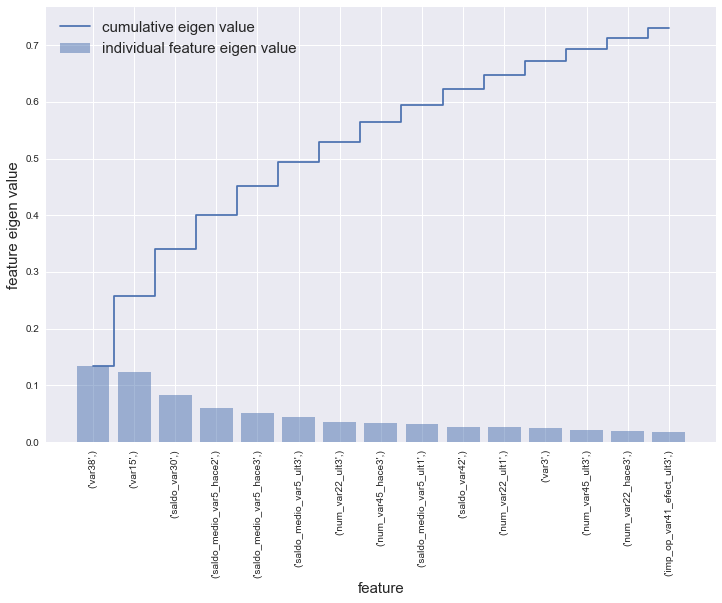

In [122]:
Eigen_value = pd.Series(importances,index=feat_labels).sort_values(ascending=False)
cum_Eigen_value = np.cumsum(Eigen_value)

#print Features
#Feature Importance Visualization
#plt.figure(size=(30,30))
plt.figure(figsize=(12,8))
plt.bar(range(1,16),Eigen_value[:15], alpha=0.5,align='center',label='individual feature eigen value')
plt.step(range(1,16), cum_Eigen_value[:15], where='mid',label='cumulative eigen value')
plt.xticks(range(1,16),Eigen_value.index[:15], rotation=90)
plt.ylabel('feature eigen value',fontsize=15)
plt.xlabel('feature',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

### 6. Analyzing Model Performance

Creating learning curve graphs for train and test data set
size:  1000
train roc_auc: 0.893604737232
test roc_auc: 0.752481626039
size:  5000
train roc_auc: 0.922550859376
test roc_auc: 0.794559139049
size:  10000
train roc_auc: 0.906799299967
test roc_auc: 0.786320642746
size:  15000
train roc_auc: 0.897692868653
test roc_auc: 0.779329008034
size:  20000
train roc_auc: 0.891488320716
test roc_auc: 0.754408837761
size:  34000
train roc_auc: 0.877143999207
test roc_auc: 0.748046825071
size:  48000
train roc_auc: 0.872045567129
test roc_auc: 0.76770137177
size:  55000
train roc_auc: 0.869780070176
test roc_auc: 0.761355735871
size:  62000
train roc_auc: 0.869095774068
test roc_auc: 0.77726798594
size:  76020
train roc_auc: 0.869095774068
test roc_auc: 0.77726798594


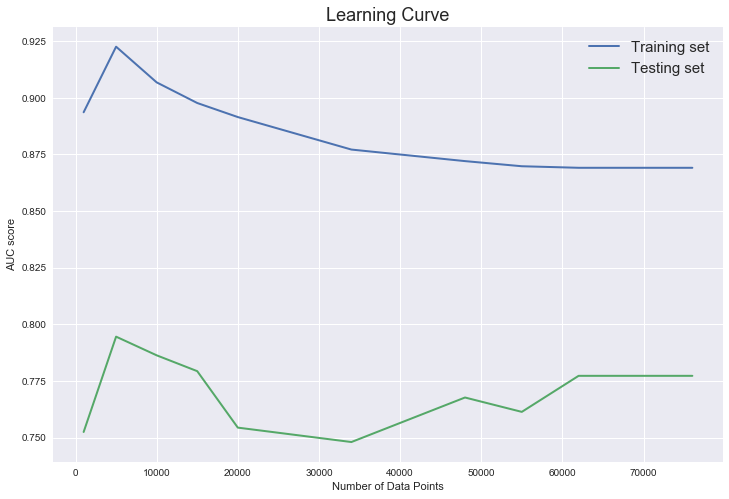

In [118]:
# choose performance metric
def performance_metric(y_true, y_pred):
    score = roc_auc_score(y_true,y_pred[:,1])
    return score

# learning rate
def learning_curves(X, y, X_test, y_test, clf):
    print ("Creating learning curve graphs for train and test data set")
    # Create the figure 
    plt.figure(figsize=(12,8))
    
    sizes = [1000,5000,10000,15000,20000,34000,48000,55000,62000,76020]
    train_score = np.zeros(len(sizes)) # score of the training set
    test_score = np.zeros(len(sizes)) # score of the test set
    
    # Create different models
    for i, s in enumerate(sizes):
            print "size: ",s   
            #scores = cross_validation.cross_val_score(clf, X[:s], y[:s],scoring='roc_auc', cv=10)
           

            # Find the performance on the testing set
            # use all the training data
            clf.fit(X[:s], y[:s])
            y_pred = clf.predict_proba(X[:s])
            #print y_pred
            train_score[i] = performance_metric(y[:s], y_pred)
            print ("train roc_auc: {}".format(train_score[i]))
            
            y_pred_test = clf.predict_proba(X_test)
            test_score[i] = performance_metric(y_test, y_pred_test)    
            print ("test roc_auc: {}".format(test_score[i])) 

    plt.plot(sizes, train_score, lw = 2, label = 'Training set')
    plt.plot(sizes, test_score, lw = 2, label = 'Testing set')
    plt.legend(loc="best",fontsize=15)
    plt.title('Learning Curve', fontsize=18)
    plt.xlabel('Number of Data Points')
    plt.ylabel('AUC score')
    

#learning_curves(X_train_norm, y_train, X_test_norm, y_test, clf_initial)
learning_curves(X_train_norm, y_train, X_test_norm, y_test, clf_6)

### 7. Final Prediction on Test Dataset

In [115]:
final_clf = clf_6
final_clf.fit(X_train_norm,y_train)
y_pred = final_clf.predict_proba(kaggle_test_norm)
submission = pd.DataFrame({"ID":test["ID"],"TARGET":y_pred[:,1]})
submission.to_csv("submission_RE.csv",index=False)
